# Tri des images acquises

Beaucoup d'images sont mal acquises et sont en fait l'acquisition à cheval sur deux images différentes de la pellicule. Nous proposons ici une solution permettant de retirer les images où l'on repère le trait inter-images de la pellicule. 

In [2]:
# librairies utiles
import numpy as np
import skimage.io as skio
import matplotlib.pyplot as plt
import scipy.fftpack as sc
import scipy.signal as sig
import skimage.filters as skf
import skimage.morphology as skmorph
import skimage.exposure as ske
import skimage.transform as skt
from skimage import img_as_ubyte
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray, gray2rgb
import cv2
import validation_functions as vf


## Créer image de référence avec rectangle

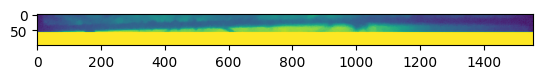

In [20]:

rectangle = skio.imread("ref_img.png", as_gray=True)
#print(rectangle)
#height, width = rectangle.shape
#for i in range(height):
#    for j in range(width):
#        if rectangle[i, j] == 1:
#            rectangle[i, j] = 0
#
#img = skio.imread("acquired_images/essai_1_1_extracted_9.jpeg", as_gray=True)
#max_height, max_width = img.shape
#ref_img2 = sc.fft2(rectangle, shape=(max_height, max_width))
#ref_img2 = abs(sc.ifft2(ref_img2))
plt.imshow(rectangle)
plt.show()

#ref_img = np.ones((max_height, max_width))*255
### Définir les coordonnées du rectangle 

#
#plt.imshow(ref_img)
#plt.imsave("ref_img2.png", ref_img, cmap="gray")
#plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


144


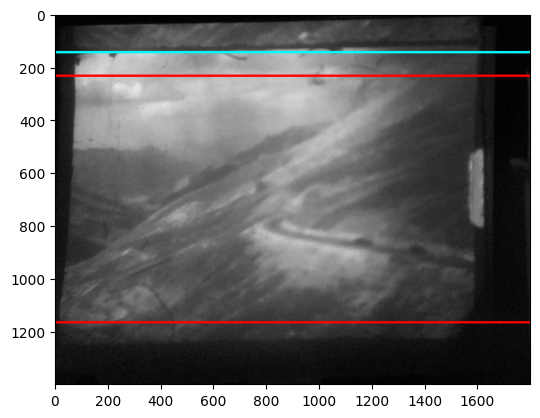

In [32]:
def get_y_distance(img, ref_img): 
    img = img - np.mean(img)
    ref_img_centred = ref_img - np.mean(ref_img)
    corr = sig.correlate(img, ref_img_centred, mode='same')

    #plt.subplot(1, 2, 1), skio.imshow(corr)
    y = np.where(np.max(corr) == corr)
    return y[0][0] 

img = skio.imread("acquired_images/essai_1_1_extracted_1.jpeg", as_gray=True)

#img = cv2.imread("acquired_images/essai_1_1_extracted_6.jpeg")
#cv2.line(img, (0, int(max_height/6)), (max_width, int(max_height/6)), (0, 255, 0), 4)
#cv2.line(img, (0, int(5*max_height/6)), (max_width, int(5*max_height/6)), (0, 255, 0), 4)

y = get_y_distance(img, rectangle)
print(y)
#y = 785
img = gray2rgb(img)
cv2.line(img, (0, y), (img.shape[1], y), (0, 255, 255), 8)
cv2.line(img, (0, int(img.shape[0]/6)), (img.shape[1], int(img.shape[0]/6)), (255, 0, 0), 8)
cv2.line(img, (0, int(5*img.shape[0]/6)), (img.shape[1], int(5*img.shape[0]/6)), (255, 0, 0), 8)

#print(get_y_distance(img, ref_img))
#plt.subplot(1, 2, 2), skio.imshow(img)
plt.imshow(img)
plt.show()

## Conclusions
Pas bon endroit --> modifier forme de base 
--> dessiner la forme sur paint pour repérer ses coord 

Prendre img_ref = une image où on coupe pour juste prendre la ligne qu'on veut

## Calculer la différence de phase entre l'image de référence et les images acquises

In [81]:
folder_path = "acquired_images"
all_filenames = vf.get_folder_filenames(folder_path)
all_y = []
i = 0
for img_path in all_filenames:
    full_img_path = folder_path + "/" + img_path
    #print(full_img_path)
    img = skio.imread(full_img_path, as_gray=True)
    # récupérer la position en y du trait noir 
    all_y.append(get_y_distance(img, ref_img))
    

##  Tracer le nombre d'images en fonction de la position en y 

[1292, 957, 1281, 1399, 1085, 1340, 1296, 1028, 1314, 1251, 738, 1399, 882, 758, 1325, 1048, 737, 1399, 911, 728, 1028, 777, 1141, 752, 1399, 1227, 848, 1330, 940, 738, 1054, 740, 1177, 823, 1290, 875, 931, 1399, 1066, 794, 1363, 1004, 1310, 1204, 805, 1384, 1386, 823, 1282, 979, 746, 1365, 778, 51, 911, 737, 1022, 1172, 772, 1127, 744, 1184, 851, 108, 905, 732, 961, 739, 1399, 1080, 848, 1259, 950, 740, 1122, 761, 1305, 944, 78, 1313, 1174, 750, 1365, 900, 107, 1229, 757, 1392, 878, 98, 750, 1287, 1399, 870, 1375, 976, 747, 1150, 851, 1296, 749, 745, 972, 1158, 926, 1174, 890, 849, 1070, 750, 1275, 943, 1399, 1116, 745, 819, 1274, 959, 1399, 1065, 860, 1338, 822, 747, 967, 1350, 884, 984, 1380, 1340, 740, 1399, 853, 1270, 971, 1393, 996, 1098, 754, 1255, 908, 1384, 1123, 750, 1272, 941, 1399, 1373, 1122, 1326, 1285, 944, 1399, 1201, 737, 1399, 877, 1321, 1143, 1036, 1399, 1162, 820, 1399, 911, 1306, 997, 1379, 1042, 1177, 761, 1119, 740, 1399, 889, 1339, 1039, 739, 1257, 908]


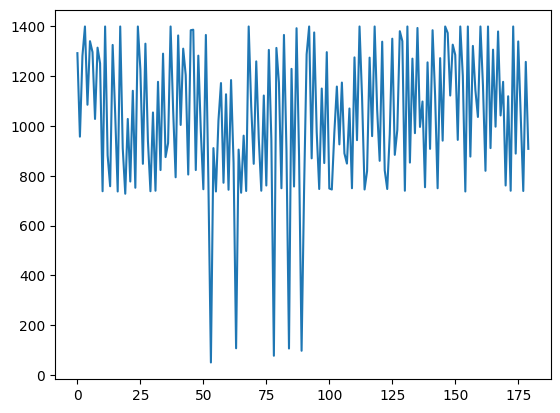

In [83]:
print(all_y)
plt.plot(all_y) 

In [85]:
good = 0
for y in all_y: 
    if y < 100 or y >1300:
        good += 1
print(good/len(all_y)*100, "%")

25.0 %


## En déduire un seuil 
## Enlever les images dont la position en y est inférieure à ce seuil